In [1]:
import pdfplumber
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

Page dimensions: 792 x 612

Text elements with positions:
DocuSign: (17.0, 11.1)
Envelope: (53.9, 11.1)
ID:: (89.4, 11.1)
6AFD713C-607A-49AD-8B9E-4FFB711B6C04: (101.9, 11.1)
Sweet: (282.1, 51.7)
Haven: (332.7, 51.7)
Dairy: (384.5, 51.7)
2023: (426.8, 51.7)
Estimated: (102.0, 70.0)
Manure: (166.4, 70.0)
and: (215.2, 70.0)
Process: (241.7, 70.0)
Wastewater/Nutrients: (294.1, 70.0)
Transferred: (428.7, 70.0)
Off-Site: (503.1, 70.0)
(Attachment: (552.8, 70.0)
C): (630.9, 70.0)
A.: (7.2, 96.2)
ESTIMATED: (19.2, 96.2)
TOTAL: (73.7, 96.2)
MANURE: (107.1, 96.2)
TRANSFERRED: (149.3, 96.2)
OFFSITE: (220.9, 96.2)
Total: (16.9, 119.2)
Manure: (41.6, 119.2)
Total: (101.5, 118.5)
Nitrogen: (126.2, 118.5)
Total: (183.9, 118.1)
Phosphorus: (208.6, 118.1)
Total: (277.5, 117.7)
Potassium: (302.2, 117.7)
Total: (380.1, 117.4)
Salts: (404.5, 117.4)
Exported: (10.2, 130.0)
(tons)*: (52.1, 130.0)
Exported: (98.8, 129.3)
(lbs)**: (140.6, 129.3)
Exported: (188.8, 128.9)
(lbs)**: (230.6, 128.9)
Exported: (278.

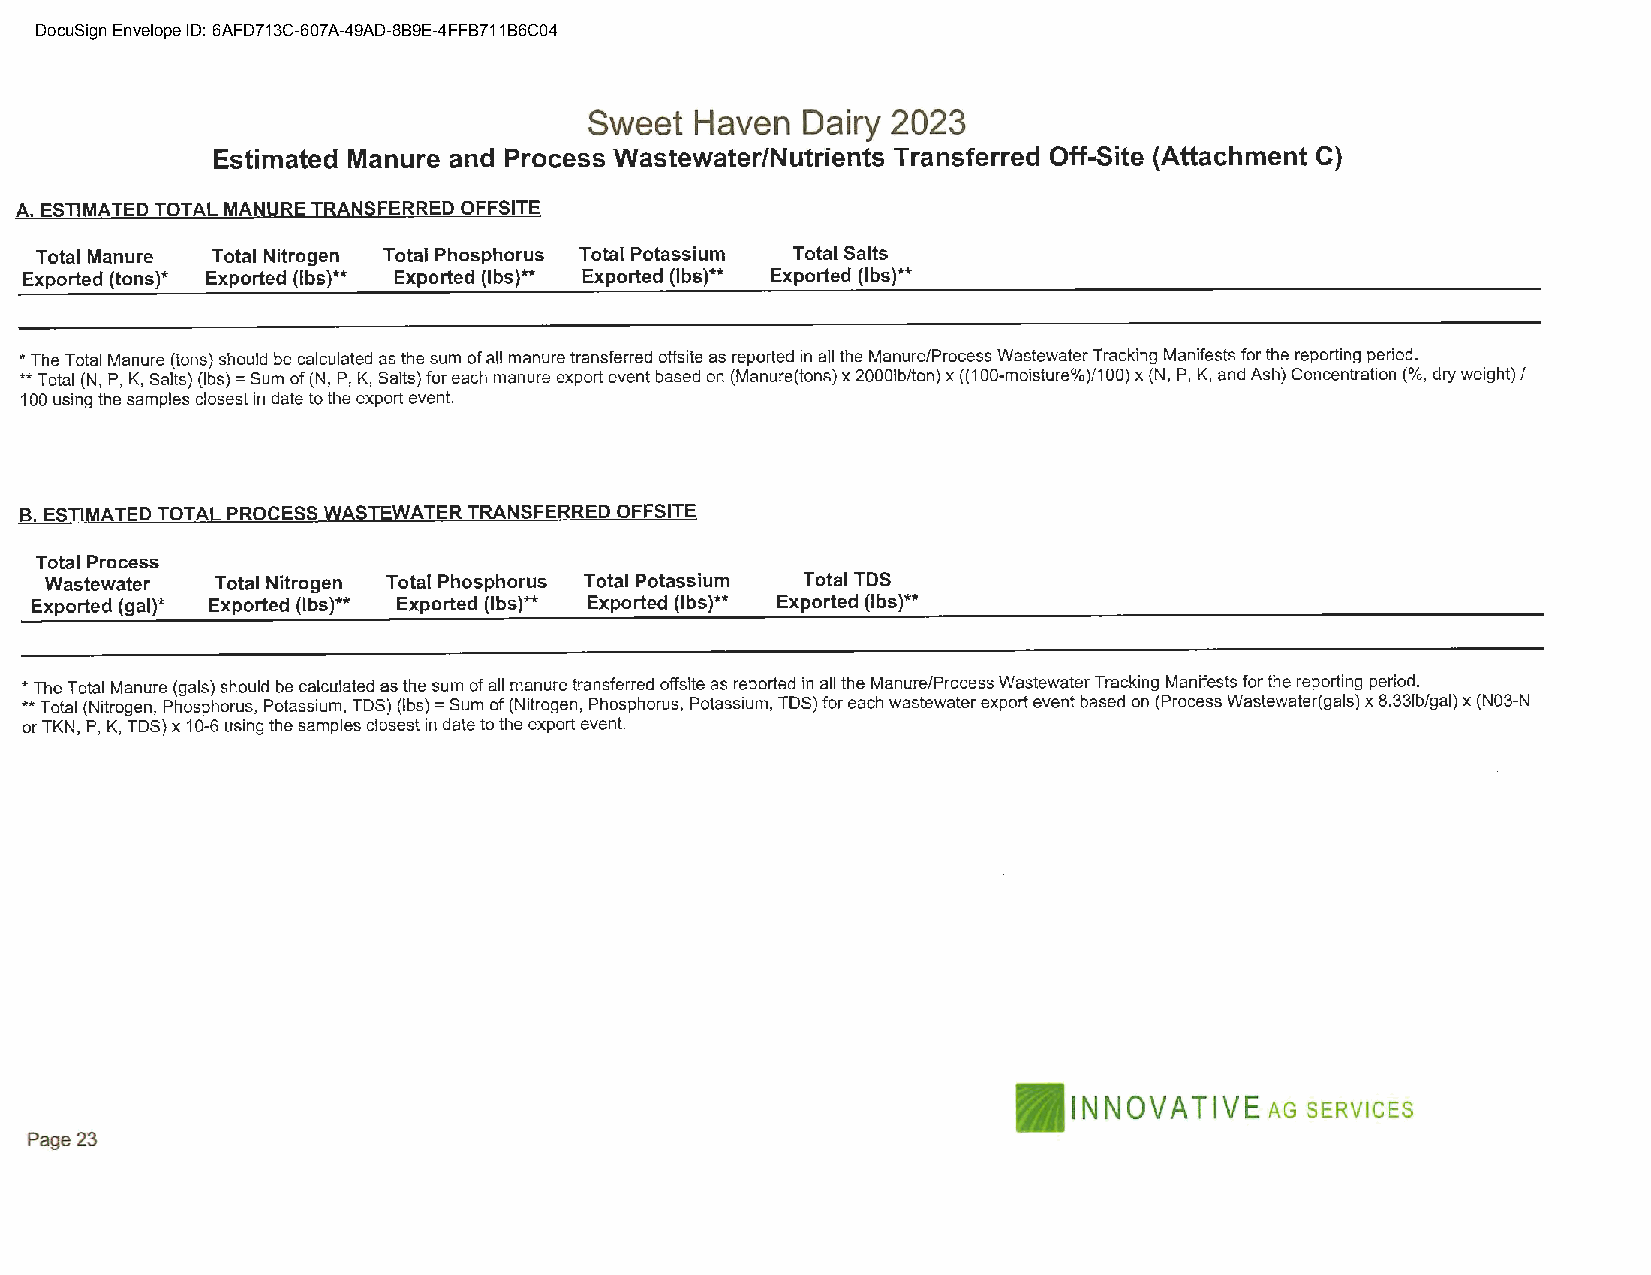

In [2]:
# PDF path
pdf_path = "/Users/dalywettermark/Documents/git/ca-cafo-compliance/data/2023/R5/fresno_madera/innovative_ag/2023AR_Black Diamond Dairy (former Sweet Haven)_10467 W Kamm Ave_Fresno.pdf"

# First, let's examine the page contents
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[23]
    
    # Get page dimensions and content
    print(f"Page dimensions: {page.width} x {page.height}")
    
    # Extract and print all text with positions
    print("\nText elements with positions:")
    words = page.extract_words()
    for word in words:
        print(f"{word['text']}: ({word['x0']:.1f}, {word['top']:.1f})")
    
    # Show the page image
    img = page.to_image(resolution=150)
    img.save("original_page.png")
    display(Image.open("original_page.png"))

In [3]:
def find_manure_data(page):
    """Try both table detection and direct text search approaches"""
    
    # Approach 1: Table detection with focus on horizontal lines
    settings = {
        "vertical_strategy": "text",
        "horizontal_strategy": "lines",
        "min_words_vertical": 1,
        "edge_min_length": 50,  # Require longer lines to avoid noise
        "text_x_tolerance": 15,
        "text_y_tolerance": 8,
        "intersection_x_tolerance": 15,
        "intersection_y_tolerance": 8,
        "snap_tolerance": 5,
        "join_tolerance": 3,
    }
    
    # First find the section header
    words = page.extract_words()
    section_top = None
    for word in words:
        if "TOTAL MANURE TRANSFERRED OFFSITE" in word['text']:
            section_top = word['top']
            break
    
    if section_top:
        # Crop to just the relevant section
        crop_area = {
            "top": section_top - 5,
            "bottom": section_top + 150,  # Adjust this value based on table height
            "x0": 0,
            "x1": page.width
        }
        cropped_page = page.crop(crop_area)
        
        # Try table detection on cropped area
        tables = cropped_page.extract_tables(settings)
        if tables:
            print("Found table using line detection:")
            for table in tables:
                for row in table:
                    print(row)
    
    # Approach 2: Direct text search based on position
    print("\nTrying direct text search:")
    target_text = "Total Manure"
    target_box = None
    
    # Find the target text box
    for word in words:
        if target_text in word['text']:
            target_box = word
            break
    
    if target_box:
        # Look for any text in a box below the target
        value_area = {
            "top": target_box['bottom'],
            "bottom": target_box['bottom'] + 30,  # Look 30 points below
            "x0": target_box['x0'] - 5,
            "x1": target_box['x1'] + 5
        }
        
        # Extract text from this area
        value_text = page.crop(value_area).extract_text()
        if value_text.strip():
            print(f"Found value below '{target_text}': {value_text}")
        else:
            print(f"No value found below '{target_text}' (NA)")
            
        # Visualize the search area
        im = page.to_image(resolution=150)
        im.draw_rect(value_area, stroke="blue", fill=(255, 255, 0, 30))
        im.save("value_search_area.png")
        display(Image.open("value_search_area.png"))

# Use the function
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[22]
    find_manure_data(page)


Trying direct text search:



Trying Loose Text Alignment:
Settings: {'vertical_strategy': 'text', 'horizontal_strategy': 'text', 'min_words_vertical': 1, 'min_words_horizontal': 1, 'text_x_tolerance': 15, 'text_y_tolerance': 8, 'intersection_x_tolerance': 15, 'intersection_y_tolerance': 8}
Found 75 edges
Found 1334 intersections


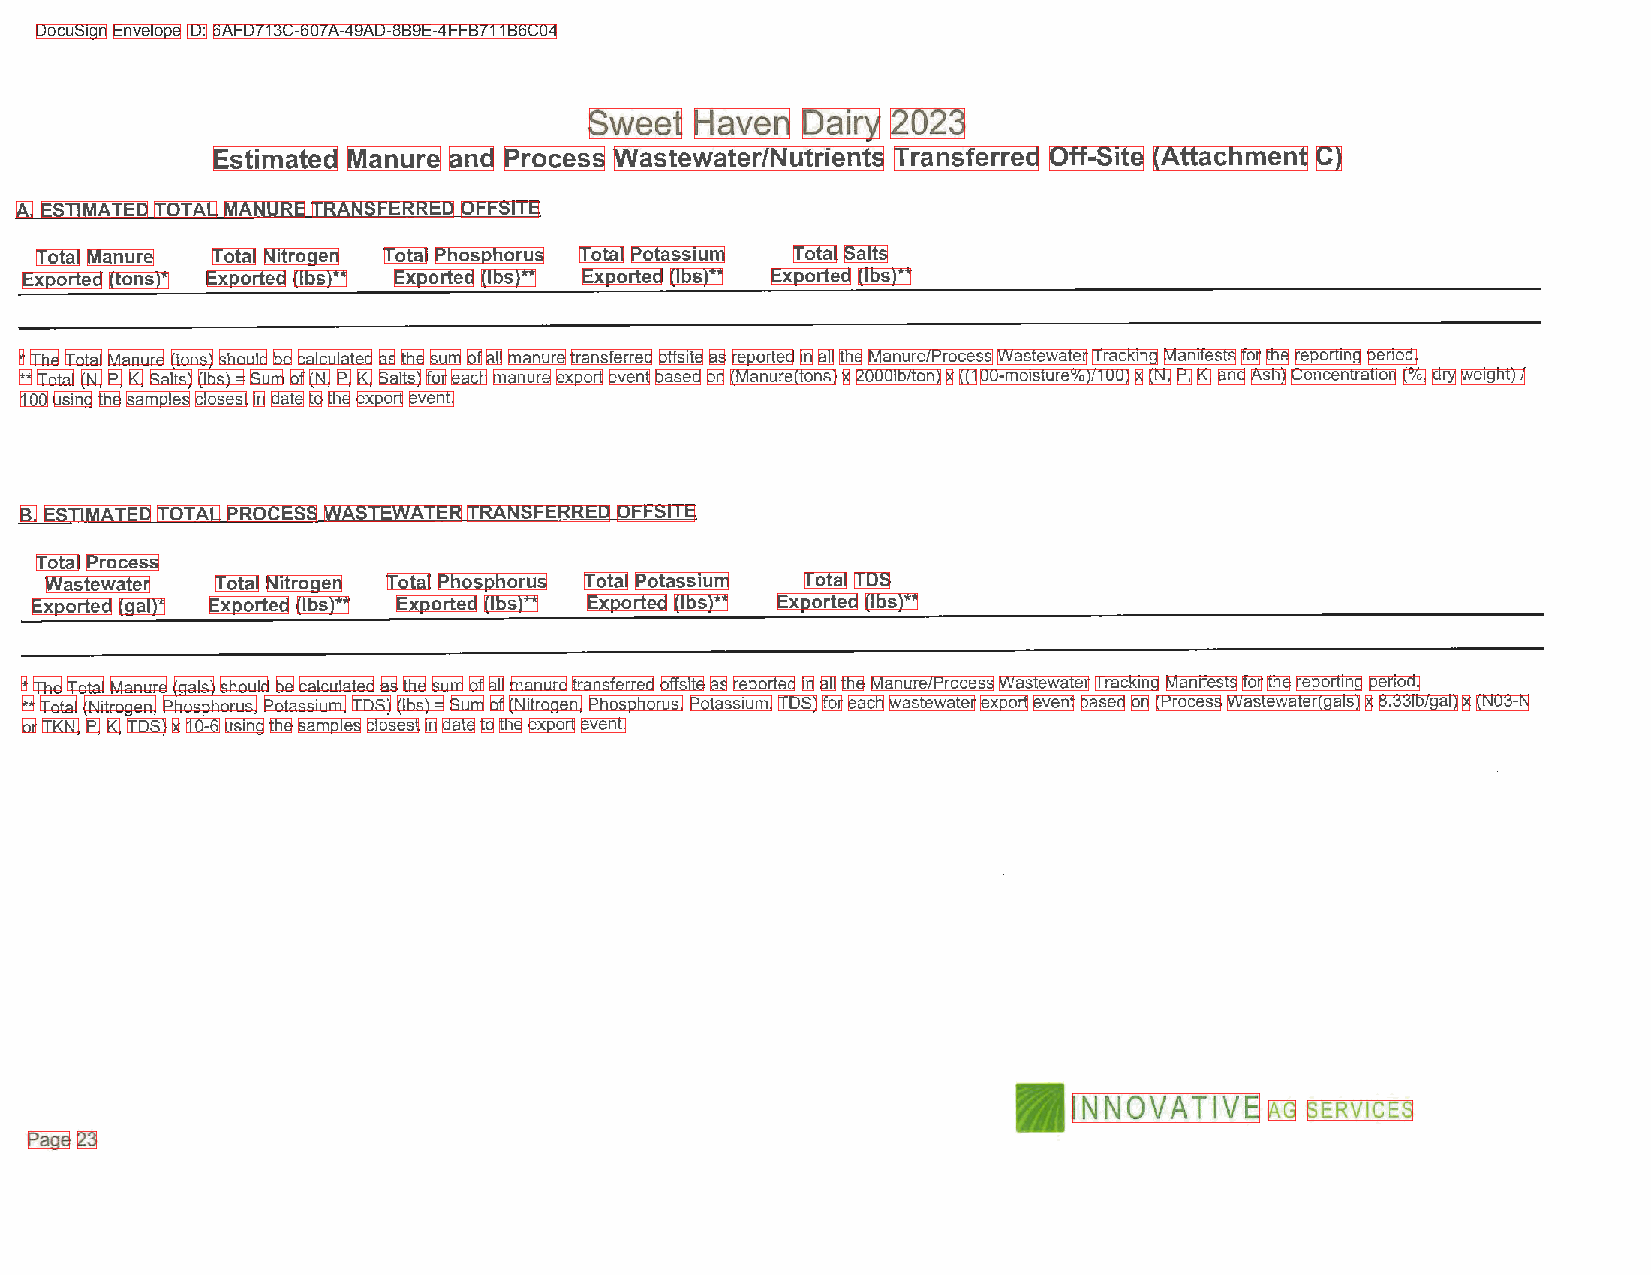


Detected cells:
Cell at (8.0349, 82.27610000000004, 13.1199, 96.15160000000003): A
Cell at (8.0349, 96.15160000000003, 13.1199, 104.95159999999998): A
Cell at (8.0349, 104.95159999999998, 13.1199, 117.38599999999997): A
Cell at (8.0349, 128.08679999999998, 13.1199, 138.7876): E
Cell at (8.0349, 138.7876, 13.1199, 167.26670000000001): E
•
Cell at (8.0349, 167.26670000000001, 13.1199, 175.9967): •
Cell at (8.0349, 175.9967, 13.1199, 186.07535000000001): ••
Cell at (8.0349, 186.07535000000001, 13.1199, 195.524): 1
Cell at (8.0349, 195.524, 13.1199, 241.95159999999998): 1
B
Cell at (8.0349, 241.95159999999998, 13.1199, 250.7516): B
Cell at (8.0349, 250.7516, 13.1199, 265.3508): B
Cell at (8.0349, 295.3852, 13.1199, 323.86670000000004): *
Cell at (8.0349, 323.86670000000004, 13.1199, 332.5967): *
Cell at (8.0349, 332.5967, 13.1199, 342.67715): *
Cell at (8.0349, 342.67715, 13.1199, 352.12669999999997): o
Cell at (8.0349, 542.4723, 13.1199, 551.3723): P
Cell at (13.1199, 11.096000000000004,

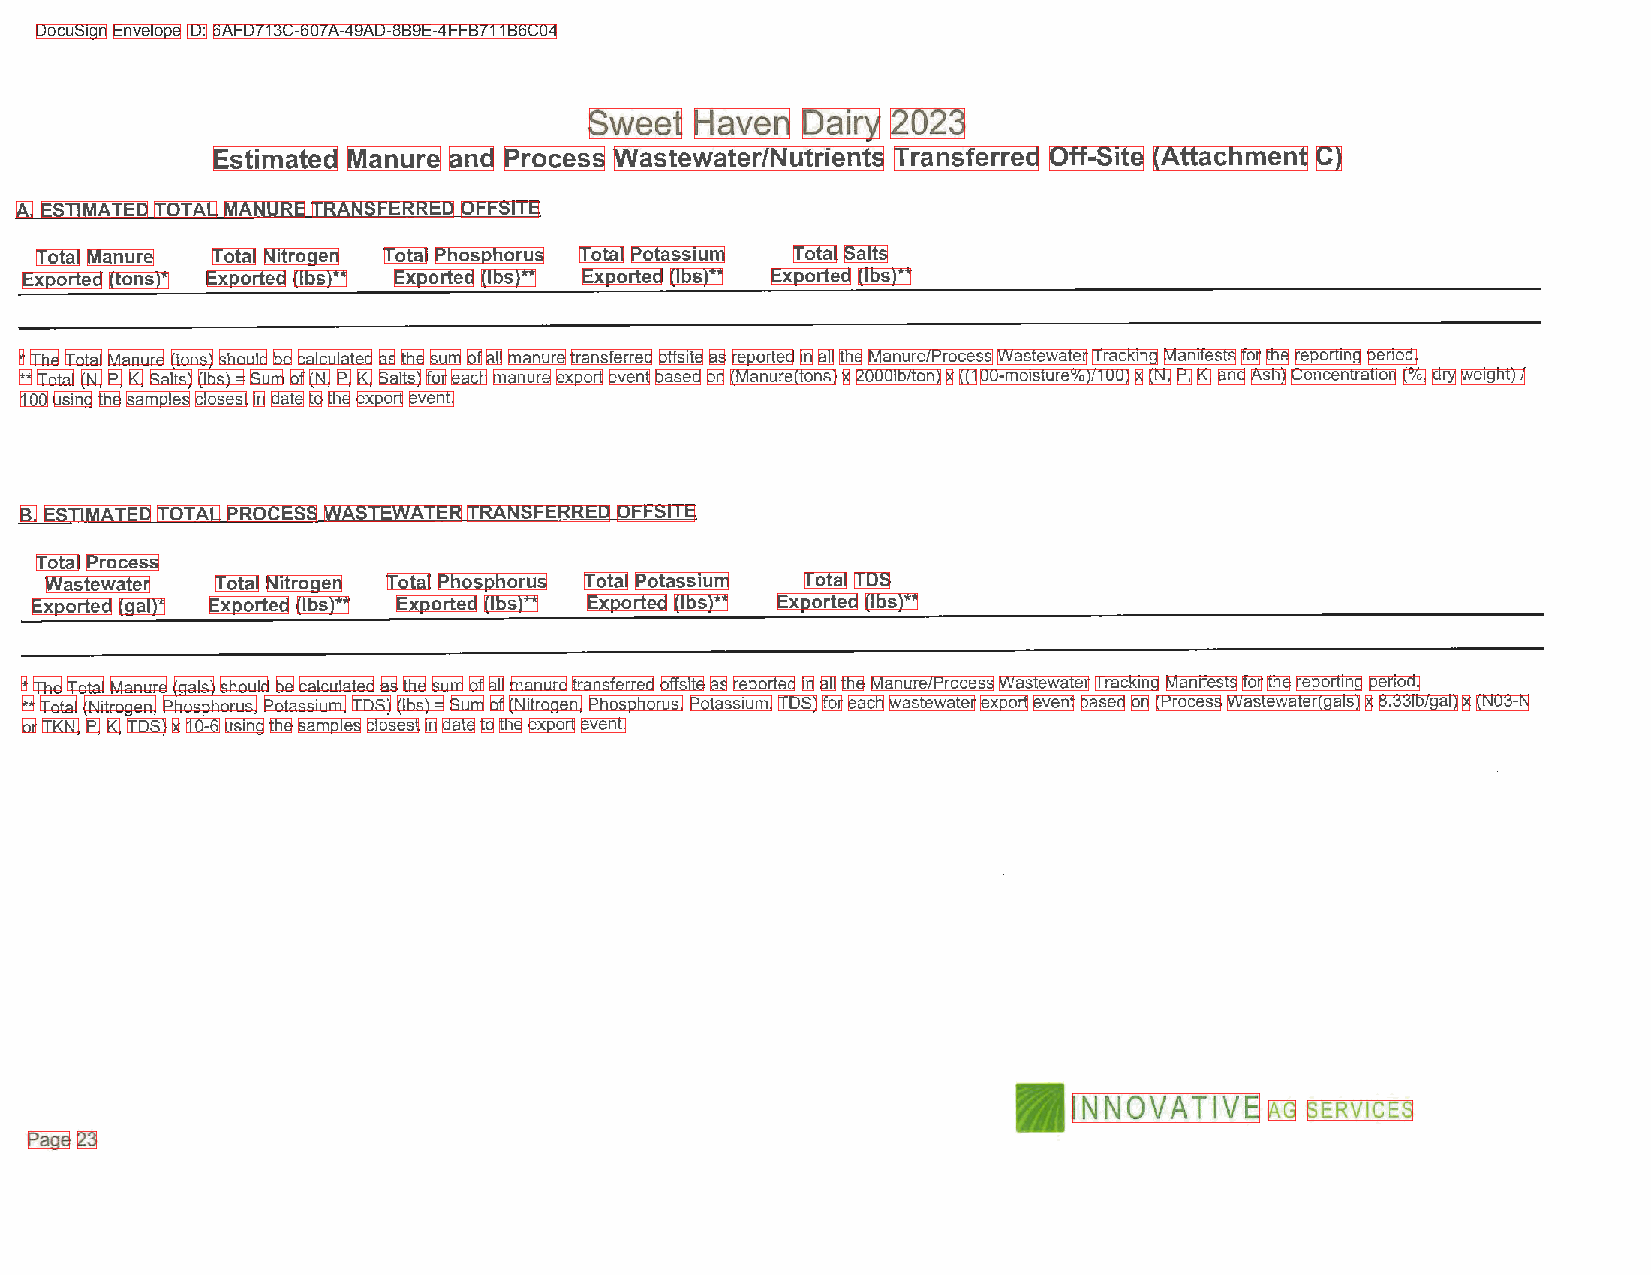


Detected cells:
Cell at (15.12163629032256, 11.096000000000004, 46.111600435897415, 19.096000000000004): DocuSig
Cell at (15.12163629032256, 19.096000000000004, 46.111600435897415, 51.677799999999934): DocuSig
Cell at (15.12163629032256, 82.27610000000004, 46.111600435897415, 96.15160000000003): . ESTIM
Cell at (15.12163629032256, 96.15160000000003, 46.111600435897415, 104.95159999999998): . ESTIM
Cell at (15.12163629032256, 104.95159999999998, 46.111600435897415, 117.38599999999997): . ESTIM
Cell at (15.12163629032256, 117.38599999999997, 46.111600435897415, 128.08679999999998): Total M
Cell at (15.12163629032256, 128.08679999999998, 46.111600435897415, 138.7876): Exported
Cell at (15.12163629032256, 138.7876, 46.111600435897415, 167.26670000000001): Exported
The Tota
Cell at (15.12163629032256, 167.26670000000001, 46.111600435897415, 175.9967): The Tota
Cell at (15.12163629032256, 175.9967, 46.111600435897415, 186.07535000000001): • Total (N
Cell at (15.12163629032256, 186.075350000

In [4]:
# Try different table detection approaches
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[23]
    
    # 1. Try with very loose text alignment
    settings1 = {
        "vertical_strategy": "text",
        "horizontal_strategy": "text",
        "min_words_vertical": 1,
        "min_words_horizontal": 1,
        "text_x_tolerance": 15,
        "text_y_tolerance": 8,
        "intersection_x_tolerance": 15,
        "intersection_y_tolerance": 8
    }
    
    # Fix the debug_table_detection function to handle dict edges
    # Modify the debug_table_detection function to check if edges are dict objects
    def debug_table_detection(page, settings, title=""):
        """Debug table detection with detailed visualization."""
        print(f"\nTrying {title}:")
        print("Settings:", settings)
        
        # Get debug information
        debug = page.debug_tablefinder(settings)
        
        # Create image
        im = page.to_image(resolution=150)
        
        # Draw text boxes in light gray for reference
        for word in page.extract_words():
            im.draw_rect(
                (word['x0'], word['top'], word['x1'], word['bottom']),
                fill=(211, 211, 211, 60)
            )
        
        # Draw detected edges - handle both object and dict formats
        print(f"Found {len(debug.edges)} edges")
        for edge in debug.edges:
            # Check if edge is a dict (newer pdfplumber versions) or object (older versions)
            if isinstance(edge, dict):
                if edge.get('orientation') == "v":
                    if edge.get('x') is not None:
                        im.draw_vline(edge.get('x'), color="red", stroke_width=1)
                        print(f"Vertical edge at x={edge.get('x'):.1f}")
                else:
                    if edge.get('y') is not None:
                        im.draw_hline(edge.get('y'), color="blue", stroke_width=1)
                        print(f"Horizontal edge at y={edge.get('y'):.1f}")
            else:
                # Original code for object-style edges
                if edge.orientation == "v":
                    if hasattr(edge, 'x') and edge.x is not None:
                        im.draw_vline(edge.x, color="red", stroke_width=1)
                        print(f"Vertical edge at x={edge.x:.1f}")
                else:
                    if hasattr(edge, 'y') and edge.y is not None:
                        im.draw_hline(edge.y, color="blue", stroke_width=1)
                        print(f"Horizontal edge at y={edge.y:.1f}")
        
        # Draw intersections - handle both object and dict formats
        print(f"Found {len(debug.intersections)} intersections")
        for inter in debug.intersections:
            if isinstance(inter, dict):
                x = inter.get('x')
                y = inter.get('y')
                if x is not None and y is not None:
                    im.draw_circle(x, y, radius=2, color="green")
            else:
                if hasattr(inter, 'x') and hasattr(inter, 'y') and inter.x is not None and inter.y is not None:
                    im.draw_circle(inter.x, inter.y, radius=2, color="green")
        
        # Save and display
        output_path = f"debug_{title.lower().replace(' ', '_')}.png"
        im.save(output_path)
        display(Image.open(output_path))
        
        # Print cell contents
        print("\nDetected cells:")
        for cell in debug.cells:
            text = page.crop(cell).extract_text().strip()
            if text:
                print(f"Cell at {cell}: {text}")
        
        return debug
    
    debug1 = debug_table_detection(page, settings1, "Loose Text Alignment")
    
    # 2. Try with explicit vertical lines based on text positions
    words = page.extract_words()
    x_positions = sorted(set([word['x0'] for word in words] + [word['x1'] for word in words]))
    
    settings2 = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_vertical_lines": x_positions,
        "min_words_horizontal": 1,
        "text_y_tolerance": 8
    }
    debug2 = debug_table_detection(page, settings2, "Explicit Columns")
    
    # 3. Try focusing on just the table area
    table_area = None
    for word in words:
        if "TOTAL MANURE TRANSFERRED OFFSITE" in word['text']:
            table_area = {
                "top": word['top'] - 10,
                "bottom": word['bottom'] + 100,
                "x0": 0,
                "x1": page.width
            }
            break
    
    if table_area:
        cropped_page = page.crop(table_area)
        settings3 = {
            "vertical_strategy": "text",
            "horizontal_strategy": "text",
            "min_words_vertical": 1,
            "min_words_horizontal": 1,
            "text_x_tolerance": 10,
            "text_y_tolerance": 5
        }
        debug3 = debug_table_detection(cropped_page, settings3, "Focused Table Area")